# Numpy

from [numpy.org](https://numpy.org):
* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities


In [1]:
import numpy as np

x = np.array([1,2,4])
print(x)
print(x.dtype)

y = np.array([[1,2,3]], dtype=np.float64)
print(y)
print(y.dtype)

print(x.shape, y.shape)

[1 2 4]
int64
[[1. 2. 3.]]
float64
(3,) (1, 3)


In [2]:
a = np.arange(1, 10, 2)   # similar to range but yields an array

print(a)

b = np.linspace(0, 1, 10) 
print(b)

c, dc = np.linspace(0, 1, 10, endpoint=False, retstep=True)
print(c, dc)

[1 3 5 7 9]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] 0.1


In [3]:
# iterating works just as with lists

for xi in x:
    print(xi)
    
y = np.array([[1, 2, 3], [4, 5, 6]])
for yi in y:
    print(yi)

1
2
4
[1 2 3]
[4 5 6]


In [4]:
# computations with arrays are per element per default

z = 2*x**2 - 3*x  
print(z)
print(np.sin(y))

M = np.ones((3,3), dtype=np.float64) # try also zeros, empty
print(M*M)
print(M@M)

[-1  2 20]
[[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [5]:
from math import sin
N = 1_000_000
xl = [i/(N-1) for i in range(N)]
xa = np.linspace(0, 1, N)
fl = lambda x: [sin(xi) for xi in x]
fa = lambda x: np.sin(x)
%timeit fl(xl)
%timeit fa(xa)

102 ms ± 894 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.36 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


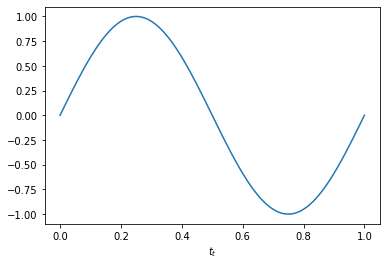

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 200)
y = np.sin(2*np.pi*t)

plt.plot(t, y)
plt.xlabel("$t_t$")
plt.show()

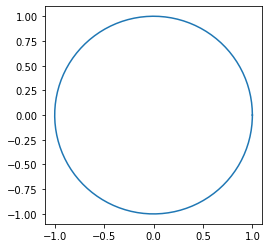

In [11]:
x = np.cos(2*np.pi*t)

plt.subplot(111, aspect='equal')
plt.plot(x, y)
plt.show()

# Array Slicing

Syntax: ARRAYNAME[START:STOP:STEP]; Defaults: START=0, STOP=len(ARRAYNAME), STEP=1

In [12]:
x = np.arange(20)
print("x:", x)
print("x from 2 to 15(excluding):", x[2:15])
print("x from 2 to 15(excluding) in steps of 2:", x[2:15:2])
# negative values
print("x backwards:", x[::-1])
print("x from 1 to 17 (19-2):", x[1:-2])
# now its harder:
print("x from the last element to the fifth last (excluding), backwards:", x[-1:-5:-1])

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
x from 2 to 15(excluding): [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
x from 2 to 15(excluding) in steps of 2: [ 2  4  6  8 10 12 14]
x backwards: [19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
x from 1 to 17 (19-2): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
x from the last element to the fifth last (excluding), backwards: [19 18 17 16]


In [13]:
x = x**2
print("x is now x^2:", x)
print("Differences in x:", x[1:]-x[:-1])          # or just np.diff(x)
print("mean of every neighboring two:", (x[:-1:2]+x[1::2])/2)

x is now x^2: [  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]
Differences in x: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]
mean of every neighboring two: [  0.5   6.5  20.5  42.5  72.5 110.5 156.5 210.5 272.5 342.5]


# Random numbers

In [15]:
x = np.random.rand(10)   # 10 random numbers in [0,1)
print("Random numbers:", x)

Random numbers: [0.08341586 0.1851669  0.49939918 0.17541029 0.3768113  0.18735186
 0.53998326 0.6874538  0.40818619 0.46158486]


# Useful array methods

In [16]:
print("Sum of all x:", x.sum())
print("Mean value of x:", x.mean())
print("Standard deviation of x:", x.std())
print("Variance of x:", x.var())
print("Minimum of x:", x.min())
print("Maximum of x:", x.max())
print("Index of the minimums in x:", x.argmin())
print("Index of the maximums in x:", x.argmax())

Sum of all x: 3.6047635017196376
Mean value of x: 0.3604763501719638
Standard deviation of x: 0.18518098770642866
Variance of x: 0.03429199820792848
Minimum of x: 0.08341586159188819
Maximum of x: 0.6874538023718832
Index of the minimums in x: 0
Index of the maximums in x: 7


# Exercise

Write a program to integrate the function $\int_0^{\pi/2}\sin(x) dx$ using the trapez method:

$$ \int_a^b f(x) dx \approx \frac{b-a}{2(N-1)} \sum_{n=1}^{N-1} (f(x_n)+f(x_{n+1}))$$

Chose different step sizes and compare the result to the analytical solution.

Optional: try a non constant spacing with:

$$ \int_a^b f(x) dx \approx \frac{1}{2} \sum_{n=1}^N (x_{n+1}-x_{n})(f(x_n)+f(x_{n+1}))$$

In [6]:
x = np.array([4,2,6,2,5])
ind = x.argsort()
print("Indices to sort x:", ind)
print("sorted version of x:", x[ind])
print("but x is unchanged:", x)
x.sort()
print("now x is sorted inplace:", x)

Indices to sort x: [1 3 0 4 2]
sorted version of x: [2 2 4 5 6]
but x is unchanged: [4 2 6 2 5]
now x is sorted inplace: [2 2 4 5 6]


In [7]:
print(x)
print(x[[0,3,4]])
x[[0,3,4]] = 1
print(x)
print(x[x>.5])
x[x>.5] = .5
print(x)

[2 2 4 5 6]
[2 5 6]
[1 2 4 1 1]
[1 2 4 1 1]
[0 0 0 0 0]


In [8]:
# other array construction functions:
print("Linear equidistant:", np.linspace(0.0, 1.0, 10))      # start, stop, count
print("Logarithmic equidistant:", np.logspace(1.0, 5.0, 10)) # start, stop, count

Linear equidistant: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
Logarithmic equidistant: [1.00000000e+01 2.78255940e+01 7.74263683e+01 2.15443469e+02
 5.99484250e+02 1.66810054e+03 4.64158883e+03 1.29154967e+04
 3.59381366e+04 1.00000000e+05]


In [9]:
# initialized Arrays; Syntax is the same for all of them:
print("Zeros:", np.zeros(10, dtype=np.complex128))
print("Ones:", np.ones((5,2), dtype=np.int32))        # 5x2 array
print("Empty:", np.empty(10))                         # do not use theses numbers!

Zeros: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Ones: [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
Empty: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Exercise

Generate an array of values with $\sin(x)$ for $x\in [0, 2\pi]$ and 200 points equidistantly spaced. Now clip these values to the range $[-.5, .5]$. This means all values smaller than -.5 must be set to -.5 and all values larger than .5 are set to .5. 

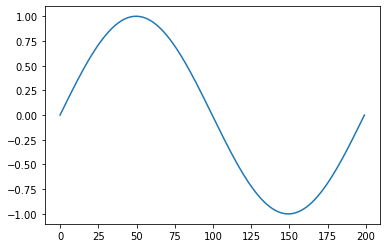

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)
plt.plot(y.copy())

# Matplotlib help

Use [matplotlib gallery](https://matplotlib.org/gallery.html) to find code examples for differnt plots

# Exercise

`x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x) + .1*np.random.randn(50)`


Use the matplotlib gallery to produce a plot with error bars, where the error bars represent the noise level.